In [21]:
#!/usr/bin/env python
"""
Tutorial to demonstrate running parameter estimation on a reduced parameter
space for an injected eccentric binary black hole signal with masses & distnace
similar to GW150914.

This uses the same binary parameters that were used to make Figures 1, 2 & 5 in
Lower et al. (2018) -> arXiv:1806.05350.

For a more comprehensive look at what goes on in each step, refer to the
"basic_tutorial.py" example.
"""
from __future__ import division
import matplotlib.pyplot as plt

import numpy as np
import bilby


In [22]:
duration = 64.
sampling_frequency = 256.

In [23]:
outdir = 'outdir'
label = 'eccentric_GW140914'
bilby.core.utils.setup_logger(outdir=outdir, label=label)

In [24]:
# Set up a random seed for result reproducibility.
np.random.seed(150914)

In [5]:
injection_parameters = dict(
    mass_1=35., mass_2=30., eccentricity=0.1, luminosity_distance=440.,
    theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1180002601.0, ra=45, dec=5.73)

In [6]:
waveform_arguments = dict(waveform_approximant='EccentricFD',
                          reference_frequency=10., minimum_frequency=10.)


In [7]:
# Create the waveform_generator using the LAL eccentric black hole no spins
# source function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments)

08:45 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_binary_black_hole_no_spins
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [25]:
bilby.gw.source.lal_eccentric_binary_black_hole_no_spins

<function bilby.gw.source.lal_eccentric_binary_black_hole_no_spins(frequency_array, mass_1, mass_2, eccentricity, luminosity_distance, theta_jn, phase, **kwargs)>

In [20]:
0.*1e0 + 1j*0.*1e0

0j

In [18]:
bilby.gw.source.lal_eccentric_binary_black_hole_no_spins(np.array([0,5,10,15,20,25]),mass_1=35., mass_2=30., eccentricity=0.1, luminosity_distance=440.,
    theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1180002601.0, ra=45, dec=5.73)

{'plus': array([ 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,
         1.30123534e-22+9.98106425e-23j,
        -1.08572738e-22+1.65309877e-23j,
         3.65036041e-23-8.01495101e-23j,
         3.93720357e-24+6.43215038e-23j]),
 'cross': array([ 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,
        -9.96867150e-23+1.29284910e-22j,
        -1.63164689e-23-1.08285894e-22j,
         7.98706128e-23+3.62778043e-23j,
        -6.40599245e-23+3.96921463e-24j])}

In [8]:
# Setting up three interferometers (LIGO-Hanford (H1), LIGO-Livingston (L1), and
# Virgo (V1)) at their design sensitivities. The maximum frequency is set just
# prior to the point at which the waveform model terminates. This is to avoid
# any biases introduced from using a sharply terminating waveform model.
minimum_frequency = 10.
maximum_frequency = 128.

In [9]:
ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)


/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.6/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
08:45 bilby INFO    : Injected signal in H1:
08:45 bilby INFO    :   optimal SNR = 66.39
08:45 bilby INFO    :   matched filter SNR = 67.49-0.58j
08:45 bilby INFO    :   mass_1 = 35.0
08:45 bilby INFO    :   mass_2 = 30.0
08:45 bilby INFO    :   eccentricity = 0.1
08:45 bilby INFO    :   luminosity_distance = 440.0
08:45 bilby INFO    :   theta_jn = 0.4
08:45 bilby INFO    :   psi = 0.1
08:45 bilby INFO    :   phase = 1.2
08:45 bilby INFO    :   geocent_time = 1180002601.0
08:45 bilby INFO    :   ra = 45
08:45 bilby INFO    :   dec = 5.73
08:45 bilby INFO    : Injected signal in L1:
08:45 bilby INFO    :   optimal SNR = 39.04
08:45 bilby INFO    :   matched filter SNR = 40.49+0.18j
08:45 bilby INFO    :   mass_1 = 35.0
0

[{'plus': array([0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         7.52172839e-24-5.64380793e-24j,
         7.51095844e-24-5.65605767e-24j,
         7.50016771e-24-5.66828589e-24j]),
  'cross': array([0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         5.62476999e-24+7.49635582e-24j,
         5.63697841e-24+7.48562221e-24j,
         5.64916539e-24+7.47486788e-24j])},
 {'plus': array([0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         7.52172839e-24-5.64380793e-24j,
         7.51095844e-24-5.65605767e-24j,
         7.50016771e-24-5.66828589e-24j]),
  'cross': array([0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         5.62476999e-24+7.49635582e-24j,
         5.63697841e-24+7.48562221e-2

In [12]:
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)
H1 = ifos[0]
H1_injection = injection[0]
idxs = H1.strain_data.frequency_mask

08:48 bilby INFO    : Injected signal in H1:
08:48 bilby INFO    :   optimal SNR = 66.39
08:48 bilby INFO    :   matched filter SNR = 200.26-0.58j
08:48 bilby INFO    :   mass_1 = 35.0
08:48 bilby INFO    :   mass_2 = 30.0
08:48 bilby INFO    :   eccentricity = 0.1
08:48 bilby INFO    :   luminosity_distance = 440.0
08:48 bilby INFO    :   theta_jn = 0.4
08:48 bilby INFO    :   psi = 0.1
08:48 bilby INFO    :   phase = 1.2
08:48 bilby INFO    :   geocent_time = 1180002601.0
08:48 bilby INFO    :   ra = 45
08:48 bilby INFO    :   dec = 5.73
08:48 bilby INFO    : Injected signal in L1:
08:48 bilby INFO    :   optimal SNR = 39.04
08:48 bilby INFO    :   matched filter SNR = 118.57+0.18j
08:48 bilby INFO    :   mass_1 = 35.0
08:48 bilby INFO    :   mass_2 = 30.0
08:48 bilby INFO    :   eccentricity = 0.1
08:48 bilby INFO    :   luminosity_distance = 440.0
08:48 bilby INFO    :   theta_jn = 0.4
08:48 bilby INFO    :   psi = 0.1
08:48 bilby INFO    :   phase = 1.2
08:48 bilby INFO    :   geo

In [11]:
H1.strain_data.frequency_array

array([0.00000000e+00, 1.56250000e-02, 3.12500000e-02, ...,
       1.27968750e+02, 1.27984375e+02, 1.28000000e+02])

In [14]:
H1.strain_data.frequency_array[idxs]

array([ 10.      ,  10.015625,  10.03125 , ..., 127.96875 ,
       127.984375, 128.      ])

00:59 bilby INFO    : Injected signal in H1:
00:59 bilby INFO    :   optimal SNR = 66.39
00:59 bilby INFO    :   matched filter SNR = 266.64-0.58j
00:59 bilby INFO    :   mass_1 = 35.0
00:59 bilby INFO    :   mass_2 = 30.0
00:59 bilby INFO    :   eccentricity = 0.1
00:59 bilby INFO    :   luminosity_distance = 440.0
00:59 bilby INFO    :   theta_jn = 0.4
00:59 bilby INFO    :   psi = 0.1
00:59 bilby INFO    :   phase = 1.2
00:59 bilby INFO    :   geocent_time = 1180002601.0
00:59 bilby INFO    :   ra = 45
00:59 bilby INFO    :   dec = 5.73
00:59 bilby INFO    : Injected signal in L1:
00:59 bilby INFO    :   optimal SNR = 39.04
00:59 bilby INFO    :   matched filter SNR = 157.61+0.18j
00:59 bilby INFO    :   mass_1 = 35.0
00:59 bilby INFO    :   mass_2 = 30.0
00:59 bilby INFO    :   eccentricity = 0.1
00:59 bilby INFO    :   luminosity_distance = 440.0
00:59 bilby INFO    :   theta_jn = 0.4
00:59 bilby INFO    :   psi = 0.1
00:59 bilby INFO    :   phase = 1.2
00:59 bilby INFO    :   geo

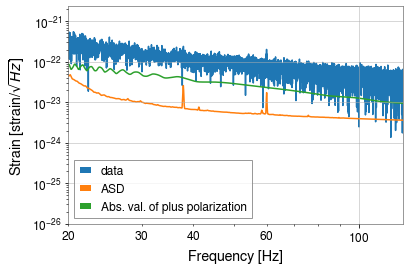

In [14]:
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)
H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization")

'''L1 = ifos[1]
L1_injection = injection[1]

ax.loglog(L1.frequency_array[idxs]+5,
          L1.amplitude_spectral_density_array[idxs],
          label="ASD")'''

ax.set_xlim(20,128)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [13]:
# Now we set up the priors on each of the binary parameters.
priors = bilby.core.prior.PriorDict()
priors["mass_1"] = 35.
priors["mass_2"] = 30.
priors["eccentricity"] = bilby.core.prior.LogUniform(
    name='eccentricity', latex_label='$e$', minimum=0.01, maximum=0.4)
priors["luminosity_distance"] = 440.
priors["dec"] = 5.73
priors["ra"] = 45
priors["theta_jn"] = 0.4
priors["psi"] = 0.1
priors["phase"] = 1.2
priors["geocent_time"] = 1180002601.0


In [14]:
# Initialising the likelihood function.
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator)


In [15]:
result = bilby.core.sampler.run_sampler(
    likelihood, priors, sampler='dynesty', outdir=outdir, label=label,
    resume=False, sample='unif', injection_parameters=injection_parameters)

01:18 bilby INFO    : Running for label 'eccentric_GW140914', output will be saved to 'outdir'
01:18 bilby INFO    : Using lal version 7.0.0
01:18 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v6.76;Id: 384ac5e4b9c95803607658118ba361dfc353dade;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
01:18 bilby INFO    : Using lalsimulation version 2.2.0
01:18 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v6.76;Id: 384ac5e4b9c95803607658118ba361dfc353dade;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
01:18 bilby INFO    : Search parameters:
01:18 bilby INFO    :   eccentricity = LogUniform(minimum=0.01, maximum=0.4, name='eccentricity', latex_label='$e$', unit=None, boundary=None)
01:18 bilby INFO    :   mass_1 = 35.0
01:18 bilby INFO    :   mass_2 = 30.0
01:18 bilby INFO    :   luminosity_distance = 440.0
01:18 bilby INFO    :   dec = 5.73
01:18 bilby INFO    :   ra = 45
01:18 bilby INFO  


0it [00:00, ?it/s]

01:18 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'unif', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fba0424c358>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
01:18 bilby INFO    : Checkpoint every check_point_delta_t = 600s
01:18 bilby INFO    : Using dynesty version 1.0.1
01:18 bilby INFO    : Generating initial points from the pri


1it [00:49, 49.64s/it, bound:0 nc:  1 ncall:1.0e+03 eff:0.1% logz-ratio=2212.72+/-0.12 dlogz:inf>0.1]
4it [00:49, 34.76s/it, bound:0 nc:  1 ncall:1.0e+03 eff:0.4% logz-ratio=2232.56+/-0.12 dlogz:867.360>0.1]
7it [00:49, 24.35s/it, bound:0 nc:  1 ncall:1.0e+03 eff:0.7% logz-ratio=2276.03+/-0.12 dlogz:827.457>0.1]
10it [00:50, 17.06s/it, bound:0 nc:  1 ncall:1.0e+03 eff:1.0% logz-ratio=2302.83+/-0.12 dlogz:809.089>0.1]
13it [00:50, 11.95s/it, bound:0 nc:  1 ncall:1.0e+03 eff:1.3% logz-ratio=2336.26+/-0.12 dlogz:764.474>0.1]
16it [00:50,  8.38s/it, bound:0 nc:  1 ncall:1.0e+03 eff:1.6% logz-ratio=2362.86+/-0.12 dlogz:734.009>0.1]
19it [00:50,  5.88s/it, bound:0 nc:  1 ncall:1.0e+03 eff:1.9% logz-ratio=2398.30+/-0.12 dlogz:699.386>0.1]
22it [00:50,  4.13s/it, bound:0 nc:  1 ncall:1.0e+03 eff:2.2% logz-ratio=2414.21+/-0.12 dlogz:692.055>0.1]
25it [00:50,  2.91s/it, bound:0 nc:  1 ncall:1.0e+03 eff:2.4% logz-ratio=2423.76+/-0.12 dlogz:674.524>0.1]
28it [00:50,  2.05s/it, bound:0 nc:  1 ncal

399it [01:12, 15.75it/s, bound:0 nc:  3 ncall:1.5e+03 eff:26.8% logz-ratio=3078.71+/-0.07 dlogz:16.065>0.1]
402it [01:12, 17.15it/s, bound:0 nc:  1 ncall:1.5e+03 eff:27.0% logz-ratio=3078.74+/-0.07 dlogz:16.028>0.1]
404it [01:12, 13.28it/s, bound:0 nc:  2 ncall:1.5e+03 eff:27.0% logz-ratio=3078.76+/-0.07 dlogz:16.003>0.1]
406it [01:12, 13.61it/s, bound:0 nc:  1 ncall:1.5e+03 eff:27.1% logz-ratio=3078.79+/-0.07 dlogz:15.978>0.1]
409it [01:12, 15.30it/s, bound:0 nc:  1 ncall:1.5e+03 eff:27.2% logz-ratio=3078.82+/-0.07 dlogz:15.941>0.1]
412it [01:12, 16.77it/s, bound:0 nc:  1 ncall:1.5e+03 eff:27.4% logz-ratio=3078.85+/-0.07 dlogz:15.906>0.1]
414it [01:13, 13.12it/s, bound:0 nc:  3 ncall:1.5e+03 eff:27.4% logz-ratio=3078.87+/-0.07 dlogz:15.882>0.1]
416it [01:13, 13.49it/s, bound:0 nc:  2 ncall:1.5e+03 eff:27.5% logz-ratio=3078.90+/-0.07 dlogz:15.858>0.1]
418it [01:13, 11.57it/s, bound:0 nc:  1 ncall:1.5e+03 eff:27.6% logz-ratio=3078.92+/-0.07 dlogz:15.834>0.1]
420it [01:13, 11.35it/s, bou

734it [01:39, 12.60it/s, bound:0 nc:  1 ncall:2.1e+03 eff:35.2% logz-ratio=3081.85+/-0.06 dlogz:12.590>0.1]
736it [01:40, 11.11it/s, bound:0 nc:  2 ncall:2.1e+03 eff:35.2% logz-ratio=3081.87+/-0.06 dlogz:12.568>0.1]
738it [01:40,  8.98it/s, bound:0 nc:  2 ncall:2.1e+03 eff:35.1% logz-ratio=3081.89+/-0.06 dlogz:12.545>0.1]
740it [01:40, 10.13it/s, bound:0 nc:  1 ncall:2.1e+03 eff:35.2% logz-ratio=3081.91+/-0.06 dlogz:12.523>0.1]
742it [01:40,  9.65it/s, bound:0 nc:  1 ncall:2.1e+03 eff:35.2% logz-ratio=3081.93+/-0.06 dlogz:12.501>0.1]
744it [01:40,  9.98it/s, bound:0 nc:  2 ncall:2.1e+03 eff:35.2% logz-ratio=3081.95+/-0.06 dlogz:12.479>0.1]
746it [01:41,  6.56it/s, bound:0 nc: 11 ncall:2.1e+03 eff:35.1% logz-ratio=3081.97+/-0.06 dlogz:12.457>0.1]
748it [01:41,  7.85it/s, bound:0 nc:  1 ncall:2.1e+03 eff:35.2% logz-ratio=3081.99+/-0.06 dlogz:12.435>0.1]
750it [01:41,  8.56it/s, bound:0 nc:  3 ncall:2.1e+03 eff:35.2% logz-ratio=3082.01+/-0.06 dlogz:12.413>0.1]
752it [01:41,  9.14it/s, bou

1025it [02:14,  4.60it/s, bound:0 nc:  8 ncall:2.8e+03 eff:36.0% logz-ratio=3084.37+/-0.06 dlogz:9.770>0.1]
1026it [02:14,  4.53it/s, bound:0 nc:  5 ncall:2.8e+03 eff:36.0% logz-ratio=3084.38+/-0.06 dlogz:9.761>0.1]
1028it [02:14,  5.70it/s, bound:0 nc:  2 ncall:2.9e+03 eff:36.0% logz-ratio=3084.40+/-0.06 dlogz:9.743>0.1]
1029it [02:15,  6.09it/s, bound:0 nc:  3 ncall:2.9e+03 eff:36.0% logz-ratio=3084.41+/-0.06 dlogz:9.734>0.1]
1032it [02:15,  7.76it/s, bound:0 nc:  1 ncall:2.9e+03 eff:36.1% logz-ratio=3084.43+/-0.06 dlogz:9.707>0.1]
1034it [02:15,  8.49it/s, bound:0 nc:  1 ncall:2.9e+03 eff:36.1% logz-ratio=3084.45+/-0.06 dlogz:9.689>0.1]
1036it [02:15,  7.66it/s, bound:0 nc:  4 ncall:2.9e+03 eff:36.1% logz-ratio=3084.46+/-0.06 dlogz:9.671>0.1]
1038it [02:15,  8.41it/s, bound:0 nc:  1 ncall:2.9e+03 eff:36.1% logz-ratio=3084.48+/-0.06 dlogz:9.653>0.1]
1040it [02:16,  7.62it/s, bound:0 nc:  1 ncall:2.9e+03 eff:36.1% logz-ratio=3084.49+/-0.06 dlogz:9.634>0.1]
1041it [02:16,  5.74it/s, bo

1278it [02:52,  4.95it/s, bound:0 nc:  3 ncall:3.7e+03 eff:34.8% logz-ratio=3086.41+/-0.07 dlogz:7.476>0.1]
1280it [02:52,  6.16it/s, bound:0 nc:  1 ncall:3.7e+03 eff:34.8% logz-ratio=3086.43+/-0.07 dlogz:7.460>0.1]
1281it [02:53,  3.79it/s, bound:0 nc: 11 ncall:3.7e+03 eff:34.7% logz-ratio=3086.43+/-0.07 dlogz:7.452>0.1]
1283it [02:53,  4.42it/s, bound:0 nc:  5 ncall:3.7e+03 eff:34.7% logz-ratio=3086.45+/-0.07 dlogz:7.437>0.1]
1284it [02:53,  4.15it/s, bound:0 nc:  6 ncall:3.7e+03 eff:34.7% logz-ratio=3086.45+/-0.07 dlogz:7.429>0.1]
1285it [02:54,  4.22it/s, bound:0 nc:  5 ncall:3.7e+03 eff:34.7% logz-ratio=3086.46+/-0.07 dlogz:7.421>0.1]
1286it [02:54,  4.82it/s, bound:0 nc:  3 ncall:3.7e+03 eff:34.7% logz-ratio=3086.47+/-0.07 dlogz:7.413>0.1]
1287it [02:54,  5.36it/s, bound:0 nc:  3 ncall:3.7e+03 eff:34.7% logz-ratio=3086.48+/-0.07 dlogz:7.405>0.1]
1288it [02:54,  5.38it/s, bound:0 nc:  4 ncall:3.7e+03 eff:34.6% logz-ratio=3086.48+/-0.07 dlogz:7.397>0.1]
1289it [02:55,  3.74it/s, bo

1489it [03:35,  3.11it/s, bound:0 nc:  6 ncall:4.6e+03 eff:32.3% logz-ratio=3087.81+/-0.07 dlogz:5.868>0.1]
1490it [03:36,  1.90it/s, bound:0 nc: 22 ncall:4.6e+03 eff:32.1% logz-ratio=3087.82+/-0.07 dlogz:5.861>0.1]
1492it [03:36,  2.53it/s, bound:0 nc:  2 ncall:4.6e+03 eff:32.2% logz-ratio=3087.83+/-0.07 dlogz:5.846>0.1]
1493it [03:37,  3.14it/s, bound:0 nc:  3 ncall:4.6e+03 eff:32.2% logz-ratio=3087.84+/-0.07 dlogz:5.839>0.1]
1494it [03:37,  2.20it/s, bound:0 nc: 17 ncall:4.7e+03 eff:32.1% logz-ratio=3087.84+/-0.07 dlogz:5.832>0.1]
1495it [03:38,  2.68it/s, bound:0 nc:  4 ncall:4.7e+03 eff:32.1% logz-ratio=3087.85+/-0.07 dlogz:5.825>0.1]
1497it [03:38,  3.23it/s, bound:0 nc:  5 ncall:4.7e+03 eff:32.0% logz-ratio=3087.86+/-0.07 dlogz:5.811>0.1]
1498it [03:38,  2.53it/s, bound:0 nc: 13 ncall:4.7e+03 eff:32.0% logz-ratio=3087.87+/-0.07 dlogz:5.803>0.1]
1500it [03:39,  3.37it/s, bound:0 nc:  2 ncall:4.7e+03 eff:32.0% logz-ratio=3087.88+/-0.07 dlogz:5.789>0.1]
1501it [03:39,  3.61it/s, bo

1693it [04:24,  3.10it/s, bound:0 nc:  6 ncall:5.7e+03 eff:29.8% logz-ratio=3088.98+/-0.07 dlogz:4.500>0.1]
1694it [04:25,  2.06it/s, bound:0 nc: 19 ncall:5.7e+03 eff:29.7% logz-ratio=3088.99+/-0.07 dlogz:4.494>0.1]
1695it [04:25,  2.16it/s, bound:0 nc:  9 ncall:5.7e+03 eff:29.7% logz-ratio=3088.99+/-0.07 dlogz:4.488>0.1]
1697it [04:26,  2.30it/s, bound:0 nc: 15 ncall:5.7e+03 eff:29.6% logz-ratio=3089.00+/-0.07 dlogz:4.476>0.1]
1700it [04:27,  3.02it/s, bound:0 nc:  4 ncall:5.7e+03 eff:29.7% logz-ratio=3089.02+/-0.07 dlogz:4.458>0.1]
1701it [04:27,  3.66it/s, bound:0 nc:  3 ncall:5.7e+03 eff:29.7% logz-ratio=3089.02+/-0.07 dlogz:4.453>0.1]
1702it [04:27,  3.48it/s, bound:0 nc:  7 ncall:5.7e+03 eff:29.6% logz-ratio=3089.03+/-0.07 dlogz:4.447>0.1]
1703it [04:27,  3.52it/s, bound:0 nc:  6 ncall:5.7e+03 eff:29.6% logz-ratio=3089.03+/-0.07 dlogz:4.441>0.1]
1704it [04:27,  4.16it/s, bound:0 nc:  3 ncall:5.8e+03 eff:29.6% logz-ratio=3089.04+/-0.07 dlogz:4.435>0.1]
1705it [04:28,  4.48it/s, bo

1884it [05:22,  2.37it/s, bound:0 nc:  6 ncall:6.9e+03 eff:27.1% logz-ratio=3089.84+/-0.07 dlogz:3.472>0.1]
1885it [05:22,  2.47it/s, bound:0 nc:  8 ncall:6.9e+03 eff:27.1% logz-ratio=3089.84+/-0.07 dlogz:3.467>0.1]
1887it [05:22,  3.28it/s, bound:0 nc:  1 ncall:7.0e+03 eff:27.1% logz-ratio=3089.85+/-0.07 dlogz:3.457>0.1]
1888it [05:23,  3.23it/s, bound:0 nc:  7 ncall:7.0e+03 eff:27.1% logz-ratio=3089.86+/-0.07 dlogz:3.452>0.1]
1889it [05:23,  3.68it/s, bound:0 nc:  4 ncall:7.0e+03 eff:27.1% logz-ratio=3089.86+/-0.07 dlogz:3.448>0.1]
1890it [05:23,  3.33it/s, bound:0 nc:  8 ncall:7.0e+03 eff:27.1% logz-ratio=3089.86+/-0.07 dlogz:3.443>0.1]
1891it [05:23,  3.27it/s, bound:0 nc:  7 ncall:7.0e+03 eff:27.1% logz-ratio=3089.87+/-0.07 dlogz:3.438>0.1]
1892it [05:24,  3.91it/s, bound:0 nc:  3 ncall:7.0e+03 eff:27.1% logz-ratio=3089.87+/-0.07 dlogz:3.433>0.1]
1893it [05:24,  2.80it/s, bound:0 nc: 13 ncall:7.0e+03 eff:27.1% logz-ratio=3089.88+/-0.07 dlogz:3.428>0.1]
1894it [05:25,  2.50it/s, bo

2075it [06:25,  2.74it/s, bound:0 nc:  6 ncall:8.3e+03 eff:25.0% logz-ratio=3090.53+/-0.07 dlogz:2.637>0.1]
2076it [06:25,  3.37it/s, bound:0 nc:  3 ncall:8.3e+03 eff:25.0% logz-ratio=3090.53+/-0.07 dlogz:2.634>0.1]
2077it [06:25,  3.80it/s, bound:0 nc:  4 ncall:8.3e+03 eff:25.0% logz-ratio=3090.53+/-0.07 dlogz:2.630>0.1]
2078it [06:25,  3.95it/s, bound:0 nc:  5 ncall:8.3e+03 eff:25.0% logz-ratio=3090.53+/-0.07 dlogz:2.626>0.1]
2079it [06:26,  2.22it/s, bound:0 nc: 20 ncall:8.3e+03 eff:24.9% logz-ratio=3090.54+/-0.07 dlogz:2.622>0.1]
2082it [06:26,  2.95it/s, bound:0 nc:  3 ncall:8.4e+03 eff:24.9% logz-ratio=3090.55+/-0.07 dlogz:2.611>0.1]
2083it [06:27,  2.88it/s, bound:0 nc:  8 ncall:8.4e+03 eff:24.9% logz-ratio=3090.55+/-0.07 dlogz:2.607>0.1]
2084it [06:27,  2.54it/s, bound:0 nc: 11 ncall:8.4e+03 eff:24.9% logz-ratio=3090.55+/-0.07 dlogz:2.603>0.1]
2085it [06:27,  3.15it/s, bound:0 nc:  3 ncall:8.4e+03 eff:24.9% logz-ratio=3090.56+/-0.07 dlogz:2.599>0.1]
2086it [06:28,  3.28it/s, bo

2249it [07:36,  2.28it/s, bound:0 nc:  4 ncall:9.9e+03 eff:22.8% logz-ratio=3091.00+/-0.07 dlogz:2.052>0.1]
2250it [07:37,  1.81it/s, bound:0 nc: 18 ncall:9.9e+03 eff:22.7% logz-ratio=3091.00+/-0.07 dlogz:2.049>0.1]
2251it [07:37,  1.91it/s, bound:0 nc: 10 ncall:9.9e+03 eff:22.7% logz-ratio=3091.00+/-0.07 dlogz:2.046>0.1]
2252it [07:38,  1.93it/s, bound:0 nc: 11 ncall:9.9e+03 eff:22.7% logz-ratio=3091.01+/-0.07 dlogz:2.043>0.1]
2253it [07:38,  1.85it/s, bound:0 nc: 13 ncall:9.9e+03 eff:22.7% logz-ratio=3091.01+/-0.07 dlogz:2.040>0.1]
2254it [07:39,  2.05it/s, bound:0 nc:  8 ncall:9.9e+03 eff:22.7% logz-ratio=3091.01+/-0.07 dlogz:2.037>0.1]
2256it [07:39,  2.36it/s, bound:0 nc: 10 ncall:9.9e+03 eff:22.7% logz-ratio=3091.02+/-0.07 dlogz:2.031>0.1]
2257it [07:40,  2.31it/s, bound:0 nc: 10 ncall:1.0e+04 eff:22.7% logz-ratio=3091.02+/-0.07 dlogz:2.028>0.1]
2258it [07:40,  2.08it/s, bound:0 nc: 13 ncall:1.0e+04 eff:22.7% logz-ratio=3091.02+/-0.07 dlogz:2.025>0.1]
2259it [07:41,  2.05it/s, bo

2423it [09:04,  4.21it/s, bound:0 nc:  6 ncall:1.2e+04 eff:20.5% logz-ratio=3091.38+/-0.07 dlogz:1.591>0.1]
2426it [09:05,  4.82it/s, bound:0 nc:  7 ncall:1.2e+04 eff:20.5% logz-ratio=3091.38+/-0.07 dlogz:1.584>0.1]
2427it [09:05,  3.92it/s, bound:0 nc:  8 ncall:1.2e+04 eff:20.5% logz-ratio=3091.38+/-0.07 dlogz:1.581>0.1]
2428it [09:06,  2.21it/s, bound:0 nc: 20 ncall:1.2e+04 eff:20.5% logz-ratio=3091.39+/-0.07 dlogz:1.579>0.1]
2429it [09:06,  2.14it/s, bound:0 nc: 11 ncall:1.2e+04 eff:20.5% logz-ratio=3091.39+/-0.07 dlogz:1.577>0.1]
2430it [09:08,  1.09it/s, bound:0 nc: 43 ncall:1.2e+04 eff:20.4% logz-ratio=3091.39+/-0.07 dlogz:1.574>0.1]
2431it [09:09,  1.11it/s, bound:0 nc: 19 ncall:1.2e+04 eff:20.4% logz-ratio=3091.39+/-0.07 dlogz:1.572>0.1]
2432it [09:13,  1.63s/it, bound:0 nc: 73 ncall:1.2e+04 eff:20.3% logz-ratio=3091.39+/-0.07 dlogz:1.570>0.1]
2433it [09:14,  1.69s/it, bound:0 nc: 40 ncall:1.2e+04 eff:20.2% logz-ratio=3091.40+/-0.07 dlogz:1.567>0.1]
2434it [09:15,  1.30s/it, bo

01:28 bilby INFO    : Written checkpoint file outdir/eccentric_GW140914_resume.pickle
01:28 bilby INFO    : Writing 1090 current samples to outdir/eccentric_GW140914_samples.dat
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.6/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.6/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
01:28 bilby WARNING : Axis limits cannot be NaN or Inf
01:28 bilby WARNING : Failed to create dynesty run plot at checkpoint



2435it [09:18,  2.00s/it, bound:0 nc:  4 ncall:1.2e+04 eff:20.2% logz-ratio=3091.40+/-0.07 dlogz:1.563>0.1]
2437it [09:19,  1.44s/it, bound:0 nc:  5 ncall:1.2e+04 eff:20.2% logz-ratio=3091.40+/-0.07 dlogz:1.558>0.1]
2438it [09:19,  1.07s/it, bound:0 nc:  4 ncall:1.2e+04 eff:20.2% logz-ratio=3091.41+/-0.07 dlogz:1.556>0.1]
2439it [09:20,  1.06s/it, bound:0 nc: 23 ncall:1.2e+04 eff:20.2% logz-ratio=3091.41+/-0.07 dlogz:1.554>0.1]
2440it [09:20,  1.15it/s, bound:0 nc:  9 ncall:1.2e+04 eff:20.2% logz-ratio=3091.41+/-0.07 dlogz:1.551>0.1]
2441it [09:21,  1.48it/s, bound:0 nc:  5 ncall:1.2e+04 eff:20.2% logz-ratio=3091.41+/-0.07 dlogz:1.549>0.1]
2442it [09:21,  1.47it/s, bound:0 nc: 15 ncall:1.2e+04 eff:20.2% logz-ratio=3091.41+/-0.07 dlogz:1.547>0.1]
2443it [09:23,  1.18it/s, bound:0 nc: 27 ncall:1.2e+04 eff:20.1% logz-ratio=3091.41+/-0.07 dlogz:1.545>0.1]
2444it [09:23,  1.16it/s, bound:0 nc: 20 ncall:1.2e+04 eff:20.1% logz-ratio=3091.42+/-0.07 dlogz:1.542>0.1]
2445it [09:24,  1.10it/s, b

2609it [11:04,  1.45it/s, bound:0 nc:  3 ncall:1.4e+04 eff:18.2% logz-ratio=3091.68+/-0.07 dlogz:1.219>0.1]
2611it [11:05,  1.80it/s, bound:0 nc:  9 ncall:1.4e+04 eff:18.2% logz-ratio=3091.69+/-0.07 dlogz:1.215>0.1]
2612it [11:05,  2.25it/s, bound:0 nc:  4 ncall:1.4e+04 eff:18.2% logz-ratio=3091.69+/-0.07 dlogz:1.214>0.1]
2613it [11:06,  1.24it/s, bound:0 nc: 36 ncall:1.4e+04 eff:18.1% logz-ratio=3091.69+/-0.07 dlogz:1.212>0.1]
2615it [11:07,  1.47it/s, bound:0 nc: 15 ncall:1.4e+04 eff:18.1% logz-ratio=3091.69+/-0.07 dlogz:1.209>0.1]
2616it [11:08,  1.71it/s, bound:0 nc:  8 ncall:1.4e+04 eff:18.1% logz-ratio=3091.69+/-0.07 dlogz:1.207>0.1]
2617it [11:08,  2.22it/s, bound:0 nc:  3 ncall:1.4e+04 eff:18.1% logz-ratio=3091.70+/-0.07 dlogz:1.205>0.1]
2618it [11:09,  1.74it/s, bound:0 nc: 19 ncall:1.4e+04 eff:18.1% logz-ratio=3091.70+/-0.07 dlogz:1.204>0.1]
2619it [11:09,  1.68it/s, bound:0 nc: 14 ncall:1.4e+04 eff:18.1% logz-ratio=3091.70+/-0.07 dlogz:1.202>0.1]
2620it [11:09,  2.06it/s, bo

2784it [13:05,  1.32it/s, bound:0 nc: 30 ncall:1.7e+04 eff:16.4% logz-ratio=3091.91+/-0.06 dlogz:0.956>0.1]
2785it [13:05,  1.66it/s, bound:0 nc:  5 ncall:1.7e+04 eff:16.4% logz-ratio=3091.91+/-0.06 dlogz:0.954>0.1]
2786it [13:06,  1.36it/s, bound:0 nc: 23 ncall:1.7e+04 eff:16.4% logz-ratio=3091.91+/-0.06 dlogz:0.953>0.1]
2787it [13:07,  1.47it/s, bound:0 nc: 12 ncall:1.7e+04 eff:16.4% logz-ratio=3091.91+/-0.06 dlogz:0.952>0.1]
2788it [13:09,  1.05s/it, bound:0 nc: 42 ncall:1.7e+04 eff:16.3% logz-ratio=3091.91+/-0.06 dlogz:0.950>0.1]
2789it [13:11,  1.42s/it, bound:0 nc: 50 ncall:1.7e+04 eff:16.3% logz-ratio=3091.91+/-0.06 dlogz:0.949>0.1]
2790it [13:12,  1.11s/it, bound:0 nc:  8 ncall:1.7e+04 eff:16.3% logz-ratio=3091.91+/-0.06 dlogz:0.948>0.1]
2791it [13:12,  1.01s/it, bound:0 nc: 17 ncall:1.7e+04 eff:16.3% logz-ratio=3091.92+/-0.06 dlogz:0.946>0.1]
2792it [13:13,  1.31it/s, bound:0 nc:  4 ncall:1.7e+04 eff:16.3% logz-ratio=3091.92+/-0.06 dlogz:0.945>0.1]
2793it [13:13,  1.49it/s, bo

2943it [15:36,  1.04it/s, bound:0 nc: 24 ncall:2.0e+04 eff:14.5% logz-ratio=3092.07+/-0.06 dlogz:0.771>0.1]
2944it [15:36,  1.09it/s, bound:0 nc: 18 ncall:2.0e+04 eff:14.5% logz-ratio=3092.07+/-0.06 dlogz:0.770>0.1]
2945it [15:41,  1.94s/it, bound:0 nc: 95 ncall:2.0e+04 eff:14.4% logz-ratio=3092.07+/-0.06 dlogz:0.769>0.1]
2946it [15:42,  1.62s/it, bound:0 nc: 19 ncall:2.0e+04 eff:14.4% logz-ratio=3092.07+/-0.06 dlogz:0.768>0.1]
2947it [15:42,  1.30s/it, bound:0 nc: 12 ncall:2.0e+04 eff:14.4% logz-ratio=3092.07+/-0.06 dlogz:0.767>0.1]
2948it [15:43,  1.05s/it, bound:0 nc: 10 ncall:2.0e+04 eff:14.4% logz-ratio=3092.07+/-0.06 dlogz:0.766>0.1]
2949it [15:45,  1.57s/it, bound:0 nc: 61 ncall:2.1e+04 eff:14.4% logz-ratio=3092.07+/-0.06 dlogz:0.765>0.1]
2950it [15:46,  1.18s/it, bound:0 nc:  6 ncall:2.1e+04 eff:14.4% logz-ratio=3092.08+/-0.06 dlogz:0.764>0.1]
2951it [15:46,  1.07it/s, bound:0 nc:  8 ncall:2.1e+04 eff:14.4% logz-ratio=3092.08+/-0.06 dlogz:0.763>0.1]
2952it [15:46,  1.38it/s, bo

3102it [18:32,  1.25it/s, bound:0 nc:  8 ncall:2.4e+04 eff:12.8% logz-ratio=3092.20+/-0.06 dlogz:0.626>0.1]
3103it [18:32,  1.46it/s, bound:0 nc:  9 ncall:2.4e+04 eff:12.8% logz-ratio=3092.20+/-0.06 dlogz:0.625>0.1]
3104it [18:33,  1.40it/s, bound:0 nc: 17 ncall:2.4e+04 eff:12.8% logz-ratio=3092.20+/-0.06 dlogz:0.625>0.1]
3105it [18:33,  1.85it/s, bound:0 nc:  3 ncall:2.4e+04 eff:12.8% logz-ratio=3092.20+/-0.06 dlogz:0.624>0.1]
3106it [18:34,  1.71it/s, bound:0 nc: 15 ncall:2.4e+04 eff:12.8% logz-ratio=3092.20+/-0.06 dlogz:0.623>0.1]
3107it [18:38,  1.60s/it, bound:0 nc: 87 ncall:2.4e+04 eff:12.8% logz-ratio=3092.20+/-0.06 dlogz:0.622>0.1]
3108it [18:38,  1.34s/it, bound:0 nc: 15 ncall:2.4e+04 eff:12.8% logz-ratio=3092.20+/-0.06 dlogz:0.621>0.1]
3110it [18:39,  1.02it/s, bound:0 nc:  5 ncall:2.4e+04 eff:12.8% logz-ratio=3092.20+/-0.06 dlogz:0.620>0.1]
3111it [18:41,  1.41s/it, bound:0 nc: 53 ncall:2.4e+04 eff:12.8% logz-ratio=3092.21+/-0.06 dlogz:0.619>0.1]
3112it [18:47,  2.74s/it, bo

01:38 bilby INFO    : Written checkpoint file outdir/eccentric_GW140914_resume.pickle
01:38 bilby INFO    : Writing 2097 current samples to outdir/eccentric_GW140914_samples.dat
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.6/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.6/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
01:38 bilby WARNING : Axis limits cannot be NaN or Inf
01:38 bilby WARNING : Failed to create dynesty run plot at checkpoint



3143it [19:29,  2.01s/it, bound:0 nc:  2 ncall:2.5e+04 eff:12.4% logz-ratio=3092.23+/-0.06 dlogz:0.594>0.1]
3144it [19:30,  1.76s/it, bound:0 nc: 26 ncall:2.5e+04 eff:12.4% logz-ratio=3092.23+/-0.06 dlogz:0.593>0.1]
3145it [19:31,  1.71s/it, bound:0 nc: 35 ncall:2.5e+04 eff:12.4% logz-ratio=3092.23+/-0.06 dlogz:0.593>0.1]
3146it [19:32,  1.32s/it, bound:0 nc:  9 ncall:2.5e+04 eff:12.4% logz-ratio=3092.23+/-0.06 dlogz:0.592>0.1]
3147it [19:32,  1.01s/it, bound:0 nc:  6 ncall:2.5e+04 eff:12.4% logz-ratio=3092.23+/-0.06 dlogz:0.591>0.1]
3148it [19:33,  1.11it/s, bound:0 nc: 14 ncall:2.5e+04 eff:12.4% logz-ratio=3092.23+/-0.06 dlogz:0.590>0.1]
3149it [19:35,  1.19s/it, bound:0 nc: 41 ncall:2.5e+04 eff:12.4% logz-ratio=3092.23+/-0.06 dlogz:0.590>0.1]
3150it [19:36,  1.23s/it, bound:0 nc: 29 ncall:2.5e+04 eff:12.4% logz-ratio=3092.23+/-0.06 dlogz:0.589>0.1]
3151it [19:40,  1.95s/it, bound:0 nc: 80 ncall:2.6e+04 eff:12.3% logz-ratio=3092.23+/-0.06 dlogz:0.588>0.1]
3152it [19:41,  1.93s/it, b

3297it [22:21,  1.03it/s, bound:0 nc: 11 ncall:2.9e+04 eff:11.3% logz-ratio=3092.32+/-0.06 dlogz:0.490>0.1]
3298it [22:22,  1.14s/it, bound:0 nc: 34 ncall:2.9e+04 eff:11.3% logz-ratio=3092.32+/-0.06 dlogz:0.489>0.1]
3299it [22:23,  1.10s/it, bound:0 nc: 22 ncall:2.9e+04 eff:11.3% logz-ratio=3092.32+/-0.06 dlogz:0.489>0.1]
3300it [22:24,  1.07s/it, bound:0 nc: 22 ncall:2.9e+04 eff:11.3% logz-ratio=3092.32+/-0.06 dlogz:0.488>0.1]
3301it [22:25,  1.06it/s, bound:0 nc: 14 ncall:2.9e+04 eff:11.3% logz-ratio=3092.33+/-0.06 dlogz:0.488>0.1]
3302it [22:31,  2.34s/it, bound:0 nc:123 ncall:2.9e+04 eff:11.3% logz-ratio=3092.33+/-0.06 dlogz:0.487>0.1]
3303it [22:33,  2.24s/it, bound:0 nc: 44 ncall:2.9e+04 eff:11.3% logz-ratio=3092.33+/-0.06 dlogz:0.486>0.1]
3304it [22:36,  2.62s/it, bound:0 nc: 77 ncall:2.9e+04 eff:11.2% logz-ratio=3092.33+/-0.06 dlogz:0.486>0.1]
3305it [22:38,  2.32s/it, bound:0 nc: 36 ncall:2.9e+04 eff:11.2% logz-ratio=3092.33+/-0.06 dlogz:0.485>0.1]
3306it [22:42,  2.99s/it, bo

3446it [25:35,  1.53s/it, bound:0 nc: 16 ncall:3.3e+04 eff:10.3% logz-ratio=3092.40+/-0.06 dlogz:0.409>0.1]
3447it [25:35,  1.15s/it, bound:0 nc:  6 ncall:3.3e+04 eff:10.3% logz-ratio=3092.40+/-0.06 dlogz:0.408>0.1]
3448it [25:37,  1.29s/it, bound:0 nc: 35 ncall:3.3e+04 eff:10.3% logz-ratio=3092.40+/-0.06 dlogz:0.408>0.1]
3449it [25:37,  1.04s/it, bound:0 nc: 10 ncall:3.3e+04 eff:10.3% logz-ratio=3092.40+/-0.06 dlogz:0.407>0.1]
3450it [25:37,  1.22it/s, bound:0 nc:  7 ncall:3.3e+04 eff:10.3% logz-ratio=3092.40+/-0.06 dlogz:0.407>0.1]
3451it [25:38,  1.43it/s, bound:0 nc:  9 ncall:3.3e+04 eff:10.3% logz-ratio=3092.40+/-0.06 dlogz:0.406>0.1]
3452it [25:42,  1.68s/it, bound:0 nc: 87 ncall:3.3e+04 eff:10.3% logz-ratio=3092.40+/-0.06 dlogz:0.406>0.1]
3453it [25:42,  1.34s/it, bound:0 nc: 12 ncall:3.4e+04 eff:10.3% logz-ratio=3092.40+/-0.06 dlogz:0.405>0.1]
3454it [25:43,  1.17s/it, bound:0 nc: 17 ncall:3.4e+04 eff:10.3% logz-ratio=3092.40+/-0.06 dlogz:0.405>0.1]
3455it [25:45,  1.34s/it, bo

3726it [27:11,  8.89it/s, bound:1 nc:  4 ncall:3.5e+04 eff:10.5% logz-ratio=3092.51+/-0.06 dlogz:0.294>0.1]
3728it [27:11, 10.05it/s, bound:1 nc:  2 ncall:3.5e+04 eff:10.5% logz-ratio=3092.51+/-0.06 dlogz:0.294>0.1]
3730it [27:12, 10.28it/s, bound:1 nc:  3 ncall:3.5e+04 eff:10.5% logz-ratio=3092.51+/-0.06 dlogz:0.293>0.1]
3733it [27:12, 12.19it/s, bound:1 nc:  1 ncall:3.5e+04 eff:10.5% logz-ratio=3092.51+/-0.06 dlogz:0.292>0.1]
3736it [27:12, 13.17it/s, bound:1 nc:  2 ncall:3.5e+04 eff:10.5% logz-ratio=3092.51+/-0.06 dlogz:0.291>0.1]
3738it [27:12, 12.38it/s, bound:1 nc:  3 ncall:3.5e+04 eff:10.5% logz-ratio=3092.51+/-0.06 dlogz:0.290>0.1]
3740it [27:12,  9.55it/s, bound:1 nc:  4 ncall:3.5e+04 eff:10.5% logz-ratio=3092.51+/-0.06 dlogz:0.290>0.1]
3742it [27:13,  8.23it/s, bound:1 nc:  1 ncall:3.5e+04 eff:10.5% logz-ratio=3092.51+/-0.06 dlogz:0.289>0.1]
3744it [27:13,  8.87it/s, bound:1 nc:  2 ncall:3.5e+04 eff:10.6% logz-ratio=3092.51+/-0.06 dlogz:0.288>0.1]
3746it [27:13,  9.38it/s, bo

4035it [27:41, 10.45it/s, bound:2 nc:  1 ncall:3.6e+04 eff:11.2% logz-ratio=3092.59+/-0.06 dlogz:0.208>0.1]
4037it [27:41, 11.33it/s, bound:2 nc:  2 ncall:3.6e+04 eff:11.2% logz-ratio=3092.59+/-0.06 dlogz:0.208>0.1]
4039it [27:41, 10.38it/s, bound:2 nc:  3 ncall:3.6e+04 eff:11.2% logz-ratio=3092.59+/-0.06 dlogz:0.207>0.1]
4041it [27:41,  9.81it/s, bound:2 nc:  3 ncall:3.6e+04 eff:11.2% logz-ratio=3092.59+/-0.06 dlogz:0.207>0.1]
4044it [27:41, 11.73it/s, bound:2 nc:  1 ncall:3.6e+04 eff:11.2% logz-ratio=3092.59+/-0.06 dlogz:0.206>0.1]
4046it [27:41, 12.42it/s, bound:2 nc:  2 ncall:3.6e+04 eff:11.2% logz-ratio=3092.59+/-0.06 dlogz:0.205>0.1]
4048it [27:42, 11.90it/s, bound:2 nc:  3 ncall:3.6e+04 eff:11.2% logz-ratio=3092.59+/-0.06 dlogz:0.205>0.1]
4050it [27:42, 12.55it/s, bound:2 nc:  2 ncall:3.6e+04 eff:11.2% logz-ratio=3092.59+/-0.06 dlogz:0.205>0.1]
4052it [27:42, 13.06it/s, bound:2 nc:  1 ncall:3.6e+04 eff:11.2% logz-ratio=3092.60+/-0.06 dlogz:0.204>0.1]
4054it [27:42, 12.31it/s, bo

4365it [28:10, 10.21it/s, bound:3 nc:  3 ncall:3.7e+04 eff:11.9% logz-ratio=3092.65+/-0.06 dlogz:0.145>0.1]
4367it [28:10, 10.39it/s, bound:3 nc:  3 ncall:3.7e+04 eff:11.9% logz-ratio=3092.65+/-0.06 dlogz:0.145>0.1]
4369it [28:10, 11.34it/s, bound:3 nc:  1 ncall:3.7e+04 eff:11.9% logz-ratio=3092.65+/-0.06 dlogz:0.145>0.1]
4372it [28:10, 13.22it/s, bound:3 nc:  1 ncall:3.7e+04 eff:11.9% logz-ratio=3092.65+/-0.06 dlogz:0.144>0.1]
4374it [28:11, 11.44it/s, bound:3 nc:  3 ncall:3.7e+04 eff:11.9% logz-ratio=3092.65+/-0.06 dlogz:0.144>0.1]
4376it [28:11, 11.25it/s, bound:3 nc:  3 ncall:3.7e+04 eff:11.9% logz-ratio=3092.65+/-0.06 dlogz:0.143>0.1]
4379it [28:11, 10.59it/s, bound:3 nc:  5 ncall:3.7e+04 eff:11.9% logz-ratio=3092.66+/-0.06 dlogz:0.143>0.1]
4381it [28:11, 11.50it/s, bound:3 nc:  1 ncall:3.7e+04 eff:11.9% logz-ratio=3092.66+/-0.06 dlogz:0.143>0.1]
4383it [28:12,  8.63it/s, bound:3 nc:  5 ncall:3.7e+04 eff:11.9% logz-ratio=3092.66+/-0.06 dlogz:0.142>0.1]
4385it [28:12,  8.16it/s, bo

4710it [28:38, 10.29it/s, bound:4 nc:  4 ncall:3.7e+04 eff:12.6% logz-ratio=3092.70+/-0.06 dlogz:0.101>0.1]
4713it [28:38, 11.56it/s, bound:4 nc:  2 ncall:3.7e+04 eff:12.6% logz-ratio=3092.70+/-0.06 dlogz:0.100>0.1]
4715it [28:38,  9.20it/s, bound:4 nc:  6 ncall:3.7e+04 eff:12.6% logz-ratio=3092.70+/-0.06 dlogz:0.100>0.1]

01:47 bilby INFO    : Written checkpoint file outdir/eccentric_GW140914_resume.pickle
01:47 bilby INFO    : Writing 2134 current samples to outdir/eccentric_GW140914_samples.dat
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.6/site-packages/dynesty/plotting.py:179: RuntimeWarning: overflow encountered in exp
  data = [nlive, np.exp(logl), np.exp(logwt), np.exp(logz)]
/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.6/site-packages/dynesty/plotting.py:203: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
01:47 bilby WARNING : Axis limits cannot be NaN or Inf
01:47 bilby WARNING : Failed to create dynesty run plot at checkpoint


4716it [28:43,  2.74it/s, bound:4 nc:  1 ncall:3.7e+04 eff:15.3% logz-ratio=3092.80+/-0.06 dlogz:0.000>0.1]

01:47 bilby INFO    : Sampling time: 0:27:49.063898


01:47 bilby INFO    : Summary of results:
nsamples: 5716
ln_noise_evidence: -18215.241
ln_evidence: -15122.444 +/-  0.056
ln_bayes_factor: 3092.797 +/-  0.056



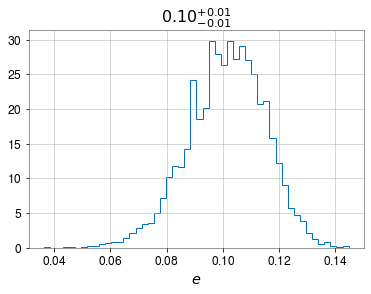

In [16]:
result.plot_corner()